In [1]:
#pacages used in this notebook
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

#pacages from previous notebooks
# from matplotlib import ticker, axis
# from matplotlib.ticker import AutoMinorLocator
# from matplotlib.backends.backend_pdf import PdfPages
# from scipy import optimize
# from scipy import misc
# from scipy import stats

#plot style
plt.style.use("style.mplstyle")
#calculate chi-squared
def chi_squared_np(x, y, y_err, slope, intercept):
    chi2 = np.sum(np.square(y - slope*x-intercept) / np.square(y_err)) 
    return chi2

OSError: 'style.mplstyle' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [ ]:
 #read the data
file = pd.read_csv(r'CL_Data.csv')
data = np.genfromtxt('CL_Data.csv')
z = np.array(data[::6,0])
counts = np.array(data[:,4])
counts_err = np.array(data[:,5])
lncts = np.array(data[:,6])
lncts_err = np.array(data[:,7])
counts_avg = [
        np.average(counts[0:6]), 
        np.average(counts[6:12]), 
        np.average(counts[12:18]), 
        np.average(counts[18:24]), 
        np.average(counts[24:30]), 
        np.average(counts[30:36]), 
        np.average(counts[36:42]), 
        np.average(counts[42:48]), 
        np.average(counts[48:54]), 
        np.average(counts[54:60]),
        np.average(counts[60:66])
        ]
lncts_avg = [
        np.average(lncts[0:6]),
        np.average(lncts[6:12]),
        np.average(lncts[12:18]),
        np.average(lncts[18:24]),
        np.average(lncts[24:30]),
        np.average(lncts[30:36]),
        np.average(lncts[36:42]),
        np.average(lncts[42:48]),
        np.average(lncts[48:54]),
        np.average(lncts[54:60]),
        np.average(lncts[60:66])
        ]
counts_err_avg = [
        np.sqrt(np.sum(np.square(counts_err[0:6])))/6,
        np.sqrt(np.sum(np.square(counts_err[6:12])))/6,
        np.sqrt(np.sum(np.square(counts_err[12:18])))/6,
        np.sqrt(np.sum(np.square(counts_err[18:24])))/6,
        np.sqrt(np.sum(np.square(counts_err[24:30])))/6,
        np.sqrt(np.sum(np.square(counts_err[30:36])))/6,
        np.sqrt(np.sum(np.square(counts_err[36:42])))/6,
        np.sqrt(np.sum(np.square(counts_err[42:48])))/6,
        np.sqrt(np.sum(np.square(counts_err[48:54])))/6,
        np.sqrt(np.sum(np.square(counts_err[54:60])))/6,
        np.sqrt(np.sum(np.square(counts_err[60:66])))/6
        ]
lncts_err_avg = np.array([
        np.sqrt(np.sum(np.square(lncts_err[0:6])))/6,
        np.sqrt(np.sum(np.square(lncts_err[6:12])))/6,
        np.sqrt(np.sum(np.square(lncts_err[12:18])))/6,
        np.sqrt(np.sum(np.square(lncts_err[18:24])))/6,
        np.sqrt(np.sum(np.square(lncts_err[24:30])))/6,
        np.sqrt(np.sum(np.square(lncts_err[30:36])))/6,
        np.sqrt(np.sum(np.square(lncts_err[36:42])))/6,
        np.sqrt(np.sum(np.square(lncts_err[42:48])))/6,
        np.sqrt(np.sum(np.square(lncts_err[48:54])))/6,
        np.sqrt(np.sum(np.square(lncts_err[54:60])))/6,
        np.sqrt(np.sum(np.square(lncts_err[60:66])))/6
        ])      
# lncts_err_avg = [
#         np.sqrt(np.sum(np.square(lncts_err[0:6]))/6),
#         np.sqrt(np.sum(np.square(lncts_err[6:12]))/6),
#         np.sqrt(np.sum(np.square(lncts_err[12:18]))/6),
#         np.sqrt(np.sum(np.square(lncts_err[18:24]))/6),
#         np.sqrt(np.sum(np.square(lncts_err[24:30]))/6),
#         np.sqrt(np.sum(np.square(lncts_err[30:36]))/6),
#         np.sqrt(np.sum(np.square(lncts_err[36:42]))/6),
#         np.sqrt(np.sum(np.square(lncts_err[42:48]))/6),
#         np.sqrt(np.sum(np.square(lncts_err[48:54]))/6),
#         np.sqrt(np.sum(np.square(lncts_err[54:60]))/6),
#         np.sqrt(np.sum(np.square(lncts_err[60:66]))/6)
#         ]          

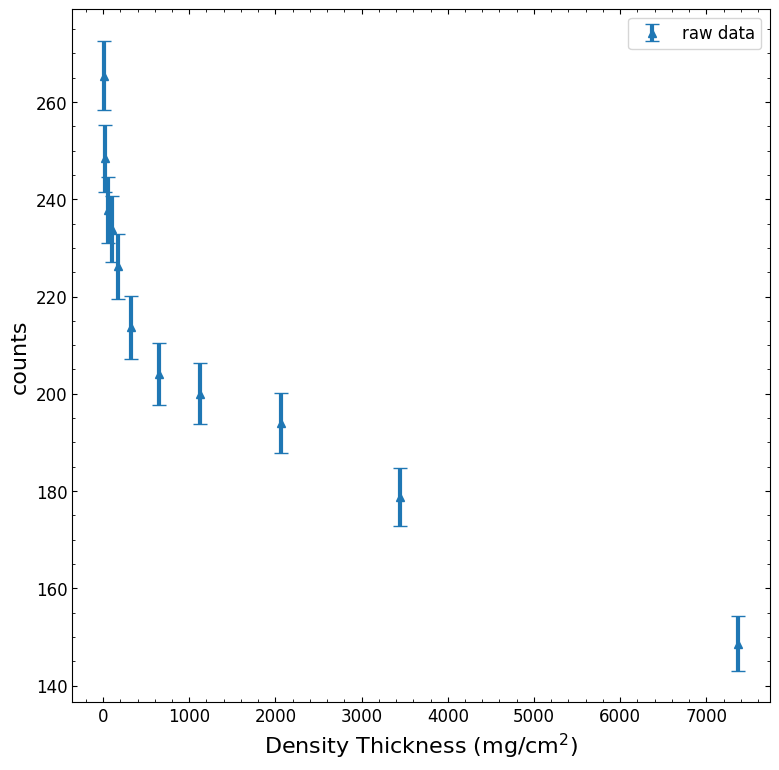

In [ ]:
fig, ax=plt.subplots()
plt.errorbar(z, counts_avg, yerr= counts_err_avg, label="raw data", linestyle='None', marker='^', capsize=5)
plt.legend()
plt.xlabel("Density Thickness (mg/cm$^2$)")
plt.ylabel("counts")
plt.savefig('CL_Data_0.jpg')

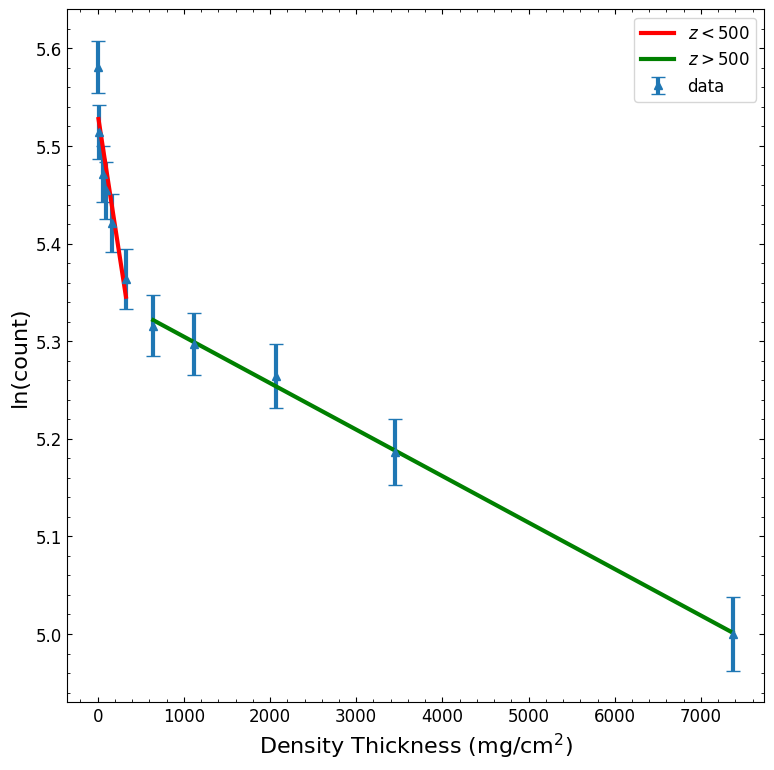

In [ ]:
fig, ax=plt.subplots()
slr_1 = LinearRegression().fit(z[0:6].transpose().reshape(-1,1), lncts_avg[0:6])
slr_2 = LinearRegression().fit(z[6:11].transpose().reshape(-1,1), lncts_avg[6:11])
plt.errorbar(z, lncts_avg, yerr= lncts_err_avg, label="data", linestyle='None', marker='^', capsize=5)
plt.plot(z[0:6], slr_1.predict(z[0:6].transpose().reshape(-1,1)),label="$z<500$", color='red')
plt.plot(z[6:11], slr_2.predict(z[6:11].transpose().reshape(-1,1)),label="$z>500$", color='green')
plt.legend()
plt.xlabel("Density Thickness (mg/cm$^2$)")
plt.ylabel("ln(count)")
plt.savefig('CL_Data_1.jpg')

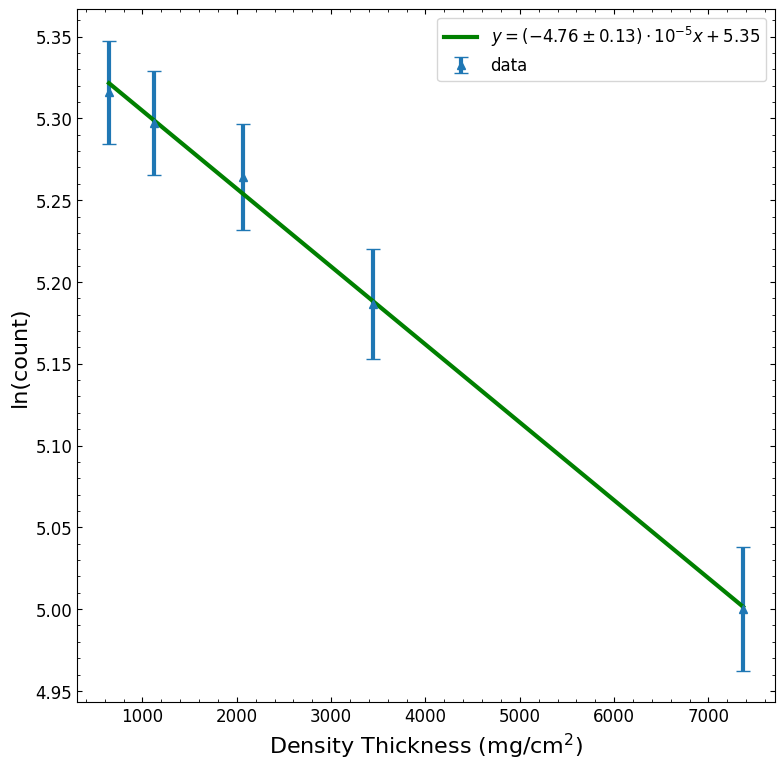

In [ ]:
fig, ax=plt.subplots()
#slr_1 = LinearRegression().fit(z[0:6].transpose().reshape(-1,1), lncts_avg[0:6])
slr_2 = LinearRegression().fit(z[6:11].transpose().reshape(-1,1), lncts_avg[6:11])
plt.errorbar(z[6:11], lncts_avg[6:11], yerr= lncts_err_avg[6:11], label="data", linestyle='None', marker='^', capsize=5)
#plt.plot(z[0:6], slr_1.predict(z[0:6].transpose().reshape(-1,1)),label="$z<500$", color='red')
plt.plot(z[6:11], slr_2.predict(z[6:11].transpose().reshape(-1,1)),label="$y=(-4.76\pm0.13)\cdot 10^{-5} x + 5.35$", color='green')
plt.legend()
plt.xlabel("Density Thickness (mg/cm$^2$)")
plt.ylabel("ln(count)")
plt.savefig('CL_Data_2.jpg')

In [ ]:
z_r = sm.add_constant(z[6:11])
ols = sm.OLS(lncts_avg[6:11], z_r)
res = ols.fit()
res.summary()

/Users/yizhi_jiao/Documents/GitHub/github/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1353.
Date:                Sun, 28 May 2023   Prob (F-statistic):           4.42e-05
Time:                        21:46:13   Log-Likelihood:                 18.995
No. Observations:                   5   AIC:                            -33.99
Df Residuals:                       3   BIC:                            -34.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3522      0.005   1088.788      0.000       5.337       5.368
x1         -4.762e-05   1.29e-06    -36.783      0.000   -5.17e-05   -4.35e-05
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.083
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.142
Skew:                           1.170   Prob(JB):                        0.565
Kurtosis:                       2.927   Cond. No.                     5.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
chi_squared_np(z[6:11], lncts_avg[6:11], lncts_err_avg[6:11], slr_2.coef_, slr_2.intercept_)

0.14094017423418914

In [11]:
mass_absorption_length = -1/(-4.762*10**(-5))
mass_absorption_length_err = mass_absorption_length**2*(1.29*10**-6)

In [12]:
print("mass_absorption_length = ", mass_absorption_length)
print("mass_absorption_length_err = ", mass_absorption_length_err)

mass_absorption_length =  20999.580008399833
mass_absorption_length_err =  568.8672450826499
